# Strike Rate Model

## Dependencies

In [25]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import simplefilter

## Loading data 

In [16]:
df = pd.read_csv("Test Batsmen/ravindra.csv")

small_constant = 1e-10
df['log_Runs'] = np.log(df['Runs'] + small_constant)
df['log_BF'] = np.log(df['BF'] + small_constant)
df['log_SR'] = np.log(df['SR'] + small_constant)

## Visualization

<Axes: >

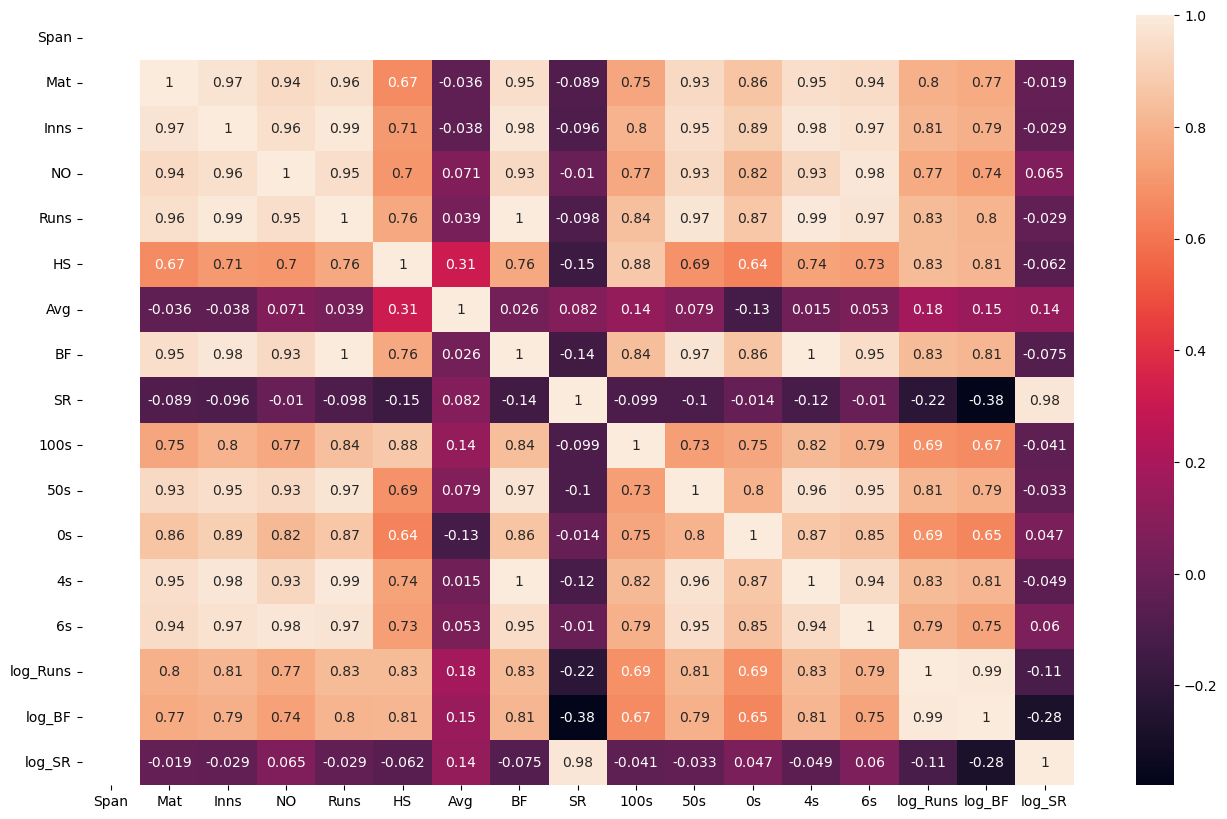

In [17]:
simplefilter(action = "ignore")
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True)

## Training Model - Strike Rate

Formula

`Strike Rate = Runs Scored * 100 / Balls Faced`

### ✅ Linear Model
- High Accuracy
- Logarithmic Transformation

In [27]:
X = df[['log_Runs', 'log_BF']]
y = df['log_SR']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

print("Input Variable:\n", X)
print("Output Varaible:\n", y)

Input Variable:
      log_Runs    log_BF
0    7.903227  8.451267
1    2.995732  3.433987
2    6.345636  6.988413
3    4.997212  5.323010
4    6.683361  7.310550
..        ...       ...
99   4.219508  5.455321
100  5.993961  6.526495
101  6.939254  7.565793
102  6.782192  7.274480
103  5.645447  5.880533

[104 rows x 2 columns]
Output Varaible:
 0      4.056989
1      4.166820
2      3.962336
3      4.279302
4      3.977811
         ...   
99     3.369018
100    4.072610
101    3.978560
102    4.112839
103    4.370081
Name: log_SR, Length: 104, dtype: float64


### Testing Model

In [26]:
predictions = model.predict(X_test)
actual_predictions = np.exp(predictions)

score = r2_score(np.exp(y_test), actual_predictions)
print(score)

greater98 = 0
less98 = 0

for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    prediction_train = model.predict(X_train)
    score = r2_score(y_test, predictions)
    if(score>0.98):
        greater98+=1
    else:
        less98+=1

        
print(greater98, less98)

0.9999999415251695
1000 0


### ⛔️ Non Linear Model
- Low Accuracy

In [28]:
X = df[['log_Runs', 'log_BF']]
y = df['log_SR']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

print("Input Variable:\n", X)
print("Output Varaible:\n", y)

Input Variable:
      log_Runs    log_BF
0    7.903227  8.451267
1    2.995732  3.433987
2    6.345636  6.988413
3    4.997212  5.323010
4    6.683361  7.310550
..        ...       ...
99   4.219508  5.455321
100  5.993961  6.526495
101  6.939254  7.565793
102  6.782192  7.274480
103  5.645447  5.880533

[104 rows x 2 columns]
Output Varaible:
 0      4.056989
1      4.166820
2      3.962336
3      4.279302
4      3.977811
         ...   
99     3.369018
100    4.072610
101    3.978560
102    4.112839
103    4.370081
Name: log_SR, Length: 104, dtype: float64


### Testing

In [29]:
predictions = model.predict(X_test)
actual_predictions = np.exp(predictions)

score = r2_score(np.exp(y_test), actual_predictions)
print(score)

greater98 = 0
less98 = 0

for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    prediction_train = model.predict(X_train)
    score = r2_score(y_test, predictions)
    if(score>0.98):
        greater98+=1
    else:
        less98+=1

        
print(greater98, less98)

0.6224220276380455
0 1000


## Data Visualization

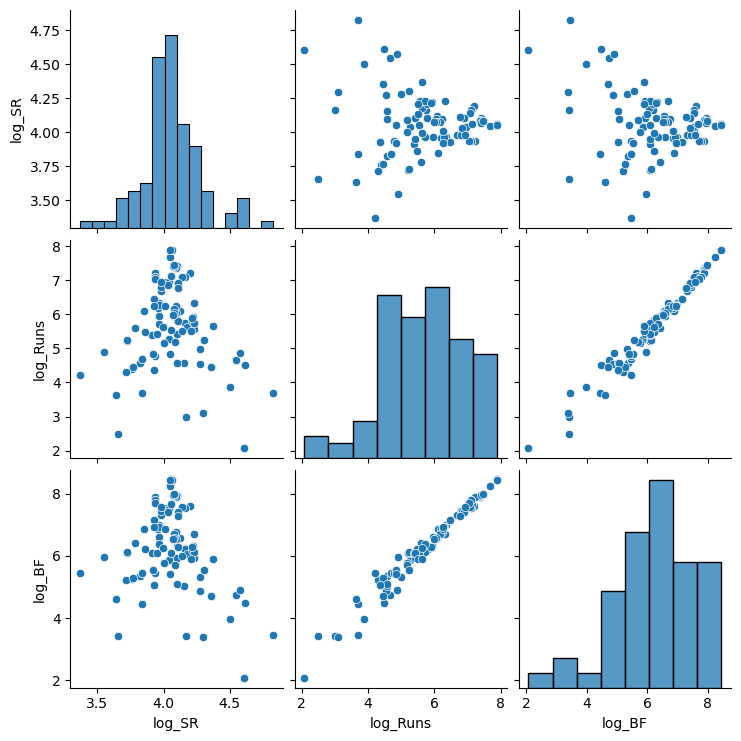

In [33]:
sns.pairplot(df,vars=['log_SR','log_Runs','log_BF'])